#**THEORETICAL**

#Q1. What is Boosting in Machine Learning?

##ANS: Boosting is an ensemble learning technique that improves the accuracy of models by training weak learners sequentially. Each model focuses on the errors of the previous ones, adjusting the sample weights to improve performance on misclassified instances.

#Q2. How does Boosting differ from Bagging?

##ANS: Boosting focuses on training models sequentially, where each new model corrects the errors of the previous one, while Bagging trains multiple models independently in parallel and aggregates their results, reducing variance without necessarily improving bias.

#Q3. What is the key idea behind AdaBoost?

##ANS: AdaBoost (Adaptive Boosting) builds models sequentially, assigning higher weights to misclassified instances so that the next model focuses more on those difficult examples. The final prediction is a weighted combination of all weak learners.

#Q4. Explain the working of AdaBoost with an example.

##ANS: Suppose we use AdaBoost with decision stumps (one-level decision trees) to classify spam emails. Initially, all emails have equal importance. After the first model misclassifies some spam emails as non-spam, those samples receive higher weights. The next model prioritizes these misclassified examples. This process repeats, and the final decision is made based on a weighted vote of all models.

#Q5. What is Gradient Boosting, and how is it different from AdaBoost?

##ANS: Gradient Boosting optimizes a loss function by iteratively adding weak models that correct residual errors of previous models, while AdaBoost focuses on updating sample weights. Gradient Boosting relies on gradient descent for error minimization, whereas AdaBoost adjusts weights based on misclassification rates.

#Q6. What is the loss function in Gradient Boosting?

##ANS: The loss function in Gradient Boosting depends on the task:

*  **For regression**: Mean Squared Error (MSE) or Mean Absolute Error (MAE).
*   **For classification**: Log Loss (Cross-Entropy). The algorithm minimizes this loss by fitting models to the negative gradient of the function.



#Q7. How does XGBoost improve over traditional Gradient Boosting?

##ANS: XGBoost enhances Gradient Boosting by incorporating:

*   Regularization (L1 & L2) to reduce overfitting.

*  Parallelization for faster computations.

*  Efficient handling of missing values.

*   Tree pruning to avoid unnecessary splits.
*   Weighted quantile sketch for optimized feature selection.



#Q8. What is the difference between **XGBoost** and **CatBoost**?

##ANS:  
*  **XGBoost** is efficient in handling large datasets and numerical features but requires preprocessing for categorical variables.
*  **CatBoost** is optimized for categorical features, using an innovative encoding method to handle categorical data without explicit transformation.



#Q9. What are some real-world applications of Boosting techniques?

##ANS:

*   **Finance**: Fraud detection in credit card transactions.

*  **Healthcare**: Disease prediction based on patient history.

*   **Marketing**: Customer churn prediction in e-commerce.
*   **Search engines**: Ranking web pages effectively.


*   **Cybersecurity**: Identifying phishing attacks.  








#Q10. How does regularization help in XGBoost?

##ANS: XGBoost applies L1 (Lasso) and L2 (Ridge) regularization to control complexity and prevent overfitting. This ensures that the model generalizes well to new data rather than memorizing the training data.



#Q11. What are some hyperparameters to tune in Gradient Boosting models?

##ANS:

*  **Learning rate**: Controls the step size of updates.

*   **Number of estimators**: The total weak learners in the ensemble.

*   **Max depth**: Restricts tree complexity to prevent overfitting.
*  **Subsample**: Fraction of data used for training each model.


*   **Min child weight**: Prevents splitting on noisy samples.


* **Gamma**: Controls minimum loss reduction for node splitting.  







#Q12. What is the concept of Feature Importance in Boosting?

##ANS: Feature Importance in Boosting measures how much a particular feature contributes to the model’s decision-making. It is calculated based on:

*  **Gain**: Contribution of a feature in reducing loss.

*  **Frequency**: How often a feature is used for splitting.
*  **Cover**: The number of samples impacted by the feature





#Q13. Why is CatBoost efficient for categorical data?

##ANS: CatBoost efficiently handles categorical data using its unique "***Ordered Boosting*** " and "***Target-Based Encoding*** " methods, which avoid overfitting and improve performance without requiring explicit one-hot encoding or label encoding.

##**PRACTICAL**


##Q14. Train an AdaBoost Classifier on a dataset and display the accuracy.

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.875


##Q15. Train an AdaBoost Regressor and compute the Mean Absolute Error (MAE).

In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 78.98841371615133


##Q16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and display feature importance.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

feature_importance = pd.Series(model.feature_importances_, index=data.feature_names)
print("Feature Importance:\n", feature_importance.sort_values(ascending=False))


Feature Importance:
 worst radius               0.443226
worst perimeter            0.150528
mean concave points        0.131765
worst concave points       0.126940
worst texture              0.035036
worst area                 0.029426
mean texture               0.027852
worst concavity            0.013858
area error                 0.008327
worst smoothness           0.007256
concave points error       0.004433
texture error              0.004086
radius error               0.003067
concavity error            0.002133
symmetry error             0.001846
perimeter error            0.001739
mean compactness           0.001431
fractal dimension error    0.001280
mean symmetry              0.000936
worst compactness          0.000777
compactness error          0.000694
mean area                  0.000647
mean concavity             0.000567
smoothness error           0.000526
worst fractal dimension    0.000494
mean perimeter             0.000323
mean fractal dimension     0.000262
mean ra

##Q17. Train a Gradient Boosting Regressor and compute the R-Squared Score.

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R-Squared Score:", r2_score(y_test, y_pred))


R-Squared Score: 0.9063009871726728


##Q18. Train an XGBoost Classifier and compare accuracy with Gradient Boosting.

In [10]:
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.895
Gradient Boosting Accuracy: 0.915


##Q19. Train a CatBoost Classifier and compute the F1-Score.

In [11]:
!pip install catboost  # Install CatBoost

import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.datasets import make_classification

# Generate a sample dataset (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost Classifier
model = CatBoostClassifier(
    iterations=100,  # Adjust as needed
    learning_rate=0.1,  # Adjust as needed
    depth=6,  # Adjust as needed
    loss_function='Logloss',  # For binary classification
    verbose=0,  # Suppress training output (set to True for verbose)
    random_state=42,
)

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)

# Print the F1-score
print(f"F1-score: {f1}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:00
F1-score: 0.8921568627450981


##Q20. Train an XGBoost Regressor and compute the Mean Squared Error (MSE).

In [12]:
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 6528.914936401449


##Q21. Train an AdaBoost Classifier and visualize feature importance.

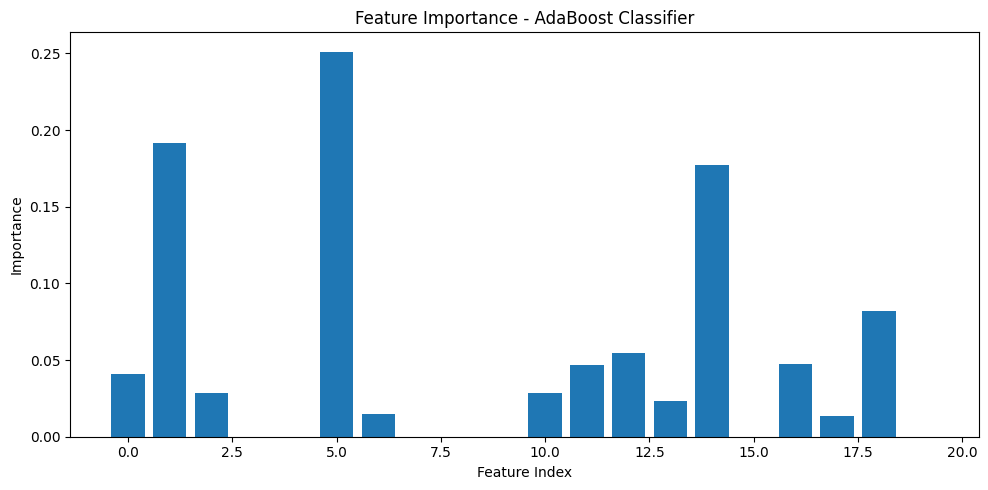

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importance - AdaBoost Classifier")
plt.tight_layout()
plt.show()


##Q22. Train a Gradient Boosting Regressor and plot learning curves.

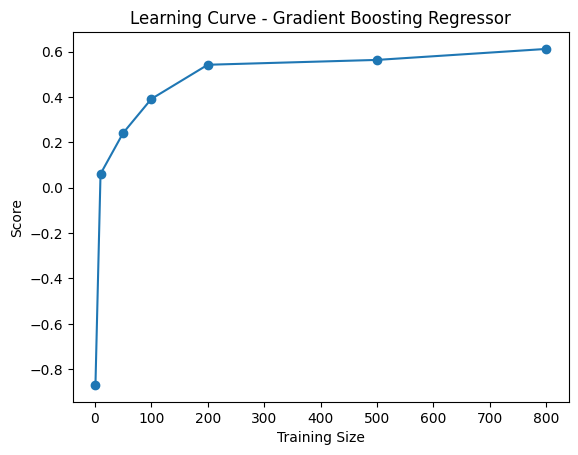

In [14]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

train_sizes = [1, 10, 50, 100, 200, 500, 800]
train_scores = []

for size in train_sizes:
    model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model.fit(X_train[:size], y_train[:size])
    train_scores.append(model.score(X_test, y_test))

plt.plot(train_sizes, train_scores, marker='o')
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curve - Gradient Boosting Regressor")
plt.show()


##Q23. Train an XGBoost Classifier and visualize feature importance.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:04:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


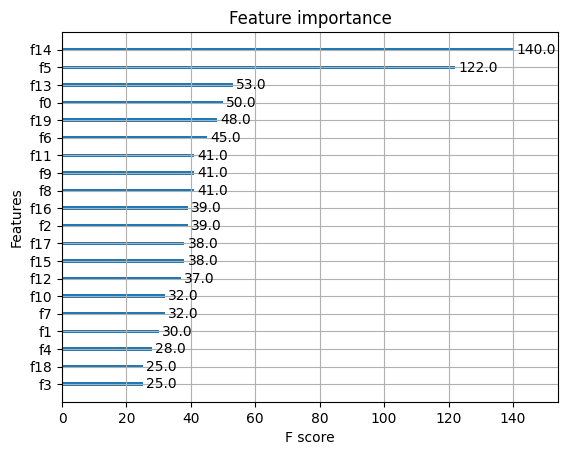

In [15]:
from xgboost import plot_importance

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

plot_importance(model)
plt.show()


##Q24. Train a CatBoost Classifier and plot the confusion matrix.

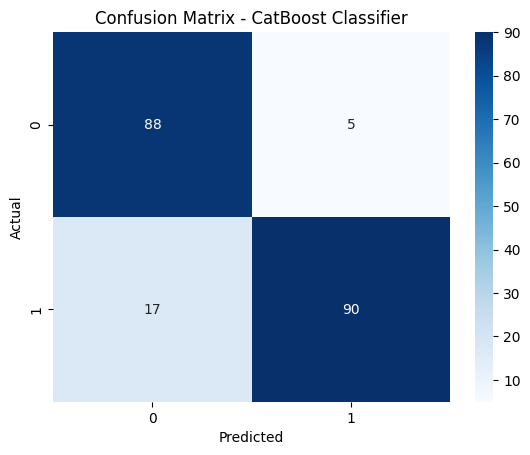

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = CatBoostClassifier(iterations=100, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


##Q25. Train an AdaBoost Classifier with different estimators and compare accuracy.

In [17]:
estimators = [10, 50, 100, 200]
for n in estimators:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with {n} estimators:", accuracy_score(y_test, y_pred))


Accuracy with 10 estimators: 0.86
Accuracy with 50 estimators: 0.875
Accuracy with 100 estimators: 0.865
Accuracy with 200 estimators: 0.865


##Q26. Train a Gradient Boosting Classifier and visualize the ROC curve.

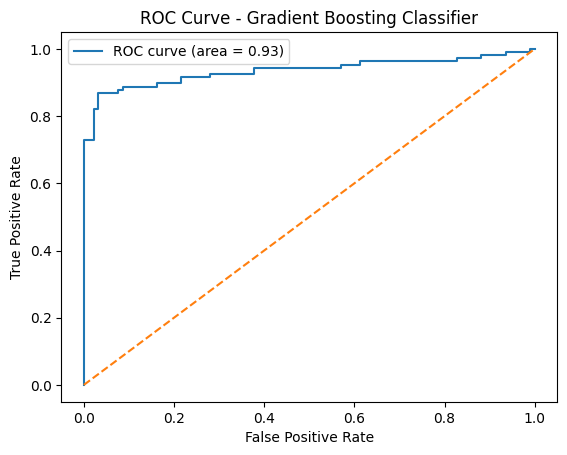

In [18]:
from sklearn.metrics import roc_curve, auc

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_scores = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Classifier")
plt.legend()
plt.show()


##Q27. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {"learning_rate": [0.01, 0.1, 0.2, 0.3]}
model = XGBRegressor()
grid_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=5)
grid_search.fit(X_train, y_train)

print("Best Learning Rate:", grid_search.best_params_["learning_rate"])


Best Learning Rate: 0.1


##Q28. Train a CatBoost Classifier on an imbalanced dataset and evaluate using class weighting.

In [20]:
model = CatBoostClassifier(iterations=100, class_weights=[1, 5], verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.85


##Q29. Train an AdaBoost Classifier and analyze the effect of different learning rates.

In [21]:
learning_rates = [0.01, 0.1, 0.5, 1.0]
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with learning rate {lr}:", accuracy_score(y_test, y_pred))


Accuracy with learning rate 0.01: 0.86
Accuracy with learning rate 0.1: 0.86
Accuracy with learning rate 0.5: 0.86
Accuracy with learning rate 1.0: 0.875


##Q30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.

In [22]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

# Generate dataset with enough informative features
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_classes=3, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
model = XGBClassifier(objective="multi:softprob", use_label_encoder=False, eval_metric="mlogloss")
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Compute Log-Loss
print("Log-Loss:", log_loss(y_test, y_pred_proba))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:05:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Log-Loss: 0.42837528138155884
